In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("..\\datasets\\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


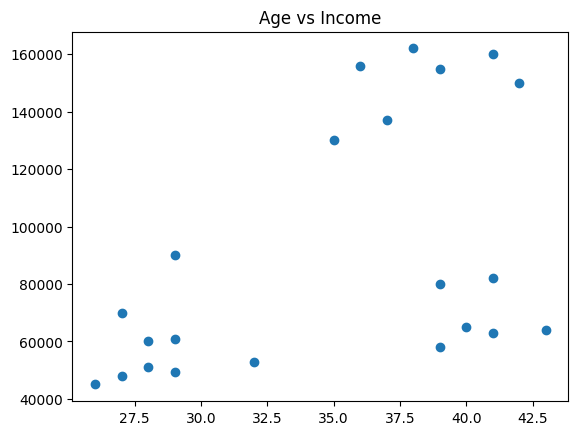

In [5]:
plt.scatter(df["Age"], df["Income($)"])
plt.title("Age vs Income")
plt.show()

In [7]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init=10)
km.fit(df[["Age", "Income($)"]])

KMeans(n_clusters=3, n_init=10)

In [8]:
km.labels_

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [9]:
df["Cluster"] = km.labels_

In [10]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


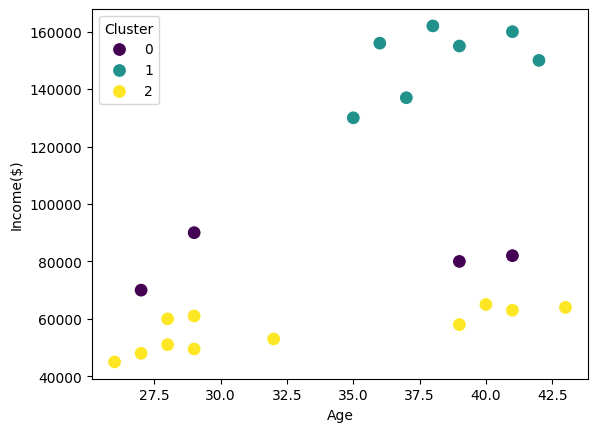

In [12]:
import seaborn as sns

sns.scatterplot(df, x="Age", y="Income($)", hue="Cluster", s=100, palette='viridis')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(columns=["Age", "Income($)"])
df_scaled[["Age", "Income($)"]] = scaler.fit_transform(df[["Age", "Income($)"]])
df_scaled.head()

,Age,Income($)
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417


In [19]:
km_scaled = KMeans(n_init='auto', n_clusters=3)
km_scaled.fit(df_scaled)

KMeans(n_clusters=3, n_init='auto')

In [22]:
df_scaled["Cluster"] =  km_scaled.labels_

In [28]:
centroids = km_scaled.cluster_centers_

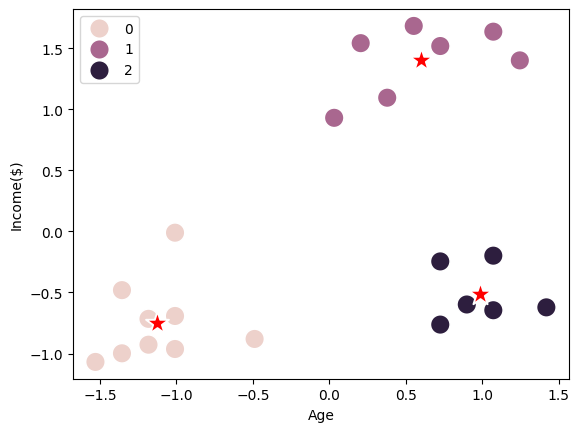

In [30]:
sns.scatterplot(df_scaled, x="Age", y="Income($)", hue="Cluster", s=200)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=300, color='red', marker="*")
plt.show()

In [27]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [32]:
km.inertia_

1577046058.883117

In [33]:
sse = []

k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df_scaled[["Age", "Income($)"]])
    sse.append(km.inertia_)

print(sse)

[43.99999999999999, 16.194890274706772, 3.889308657130143, 2.828763380093525, 2.35172600282565, 1.9763315205911218, 1.493122033941377, 1.2495452383455599, 1.0305057755583313]


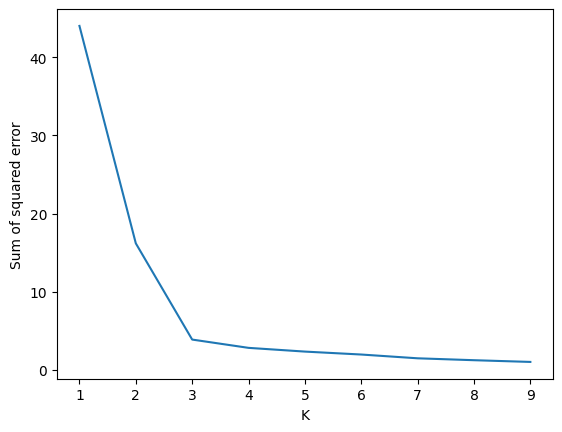

In [34]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse)
plt.show()